In [1]:
#Importing some of the necessary libraries for the analysis

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import cufflinks as cf
import chart_studio.plotly as py
import plotly.express as px

%matplotlib inline

# make plotly work in your jupyter notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# use plotly locally


In [2]:
file = 'C:/Users/Lizzy/Documents/titanic.csv'
df= pd.read_csv(file)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [3]:
# To check for the structure and behaviour of the data

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [4]:
#Checking for missing values in the data

df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

# DATA PREPROCESSING

In [5]:
# Treating the missing values

#Replace missing values with different values for each column

newDf =  (df.fillna({'age': 27, 'fare': 7.2250, 'cabin': 'C26', 'embarked': 'S', 'boat': 8, 'body': 310,  'home.dest':'St Louis, MO'}))

In [6]:
newDf

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,310.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,310.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,8,310.0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,8,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,8,310.0,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C26,C,8,328.0,"St Louis, MO"
1305,3,0,"Zabour, Miss. Thamine",female,27.0000,1,0,2665,14.4542,C26,C,8,310.0,"St Louis, MO"
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C26,C,8,304.0,"St Louis, MO"
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C26,C,8,310.0,"St Louis, MO"


In [7]:
newDf.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,310.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,310.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,8,310.0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,8,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,8,310.0,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,310.0,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,310.0,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,8,310.0,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,310.0,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,C26,C,8,22.0,"Montevideo, Uruguay"


In [8]:
newDf.tail(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1299,3,0,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,C26,C,C,310.0,"St Louis, MO"
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,C26,C,8,310.0,"St Louis, MO"
1301,3,0,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,C26,C,8,312.0,"St Louis, MO"
1302,3,0,"Yousif, Mr. Wazli",male,27.0,0,0,2647,7.2250,C26,C,8,310.0,"St Louis, MO"
1303,3,0,"Yousseff, Mr. Gerious",male,27.0,0,0,2627,14.4583,C26,C,8,310.0,"St Louis, MO"
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,C26,C,8,328.0,"St Louis, MO"
1305,3,0,"Zabour, Miss. Thamine",female,27.0,1,0,2665,14.4542,C26,C,8,310.0,"St Louis, MO"
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,C26,C,8,304.0,"St Louis, MO"
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,C26,C,8,310.0,"St Louis, MO"
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,C26,S,8,310.0,"St Louis, MO"


In [9]:
newDf.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64

In [10]:
newDf.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

# DATA VISUALIZATION USING MATPLOTLIB

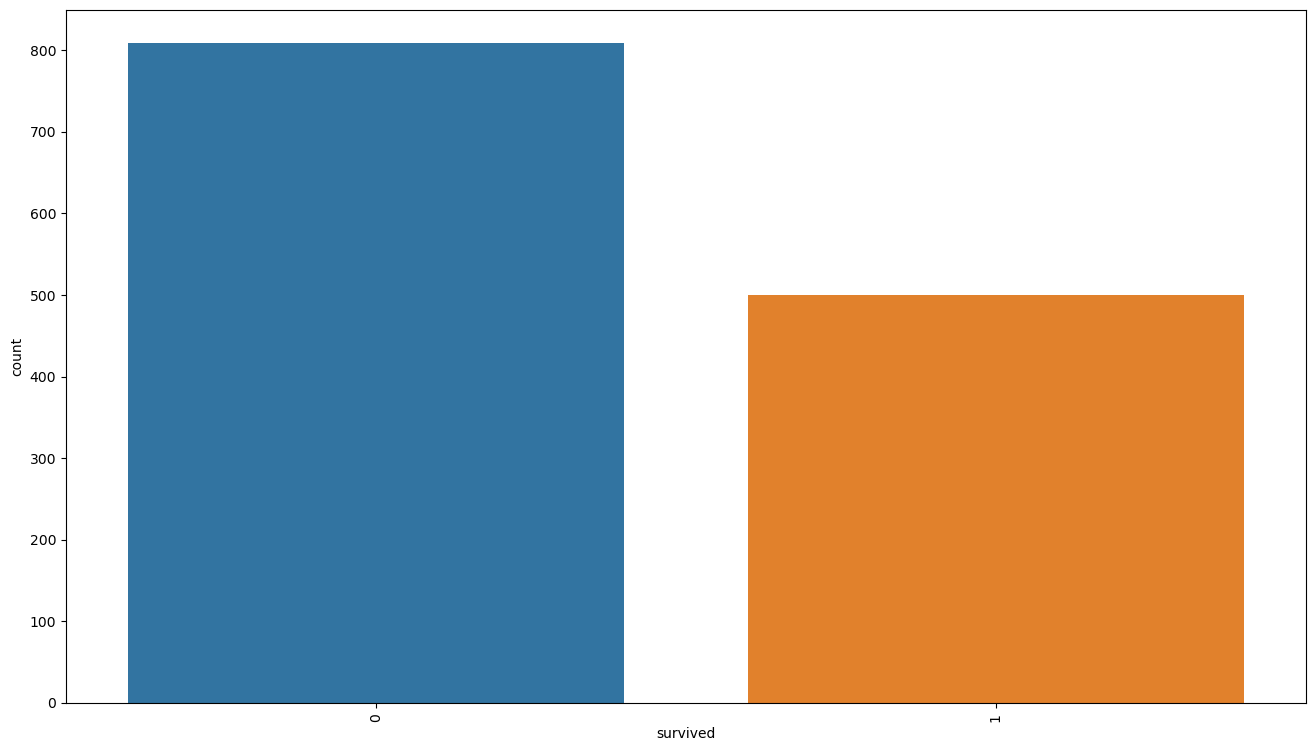

In [11]:
plt.subplots(figsize =(16,9))
ax = sb.countplot(x=newDf['survived'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [ ]:
INSIGHTS

The above visual indicated about 800 males survived and 500 females survived.

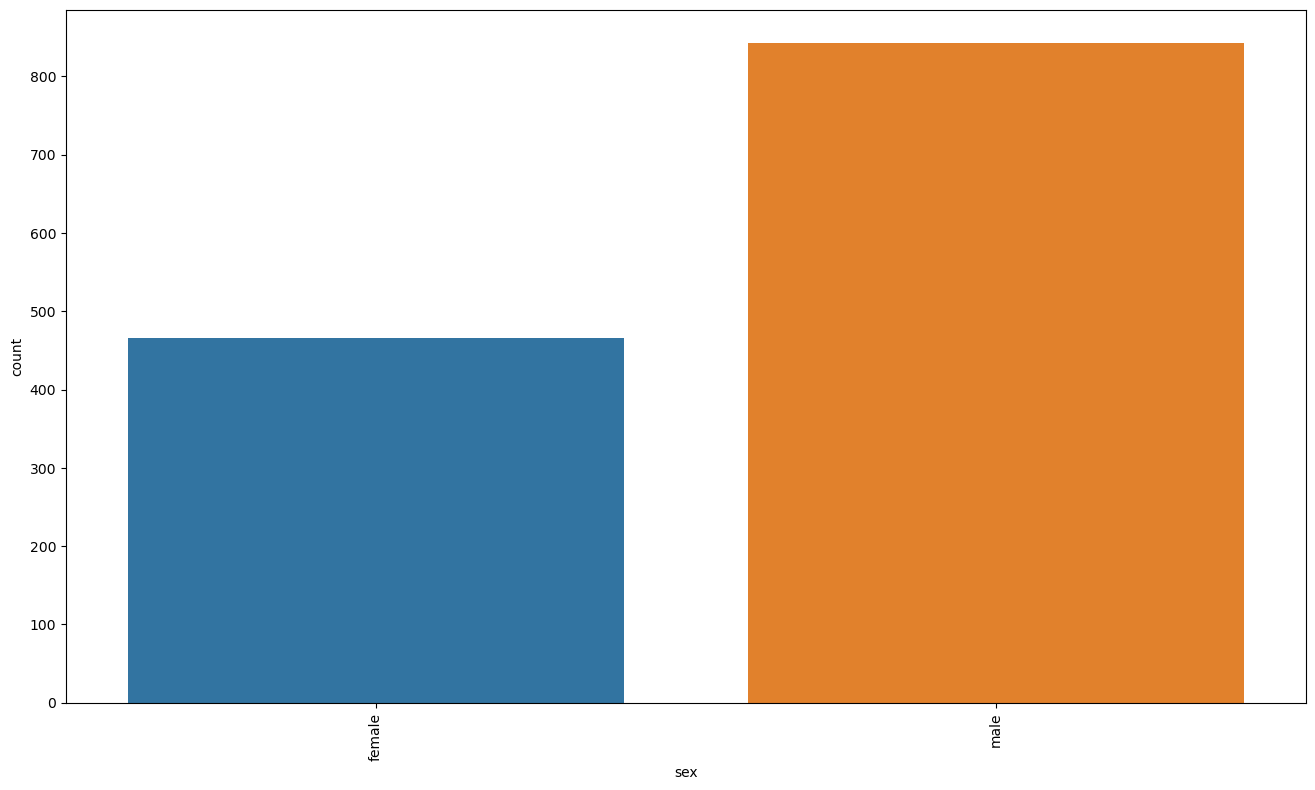

In [12]:
plt.subplots(figsize =(16,9))
ax = sb.countplot(x=newDf['sex'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [ ]:
INSIGHT

This shows the count of female to be about 500 and that of male to be 800 in number.

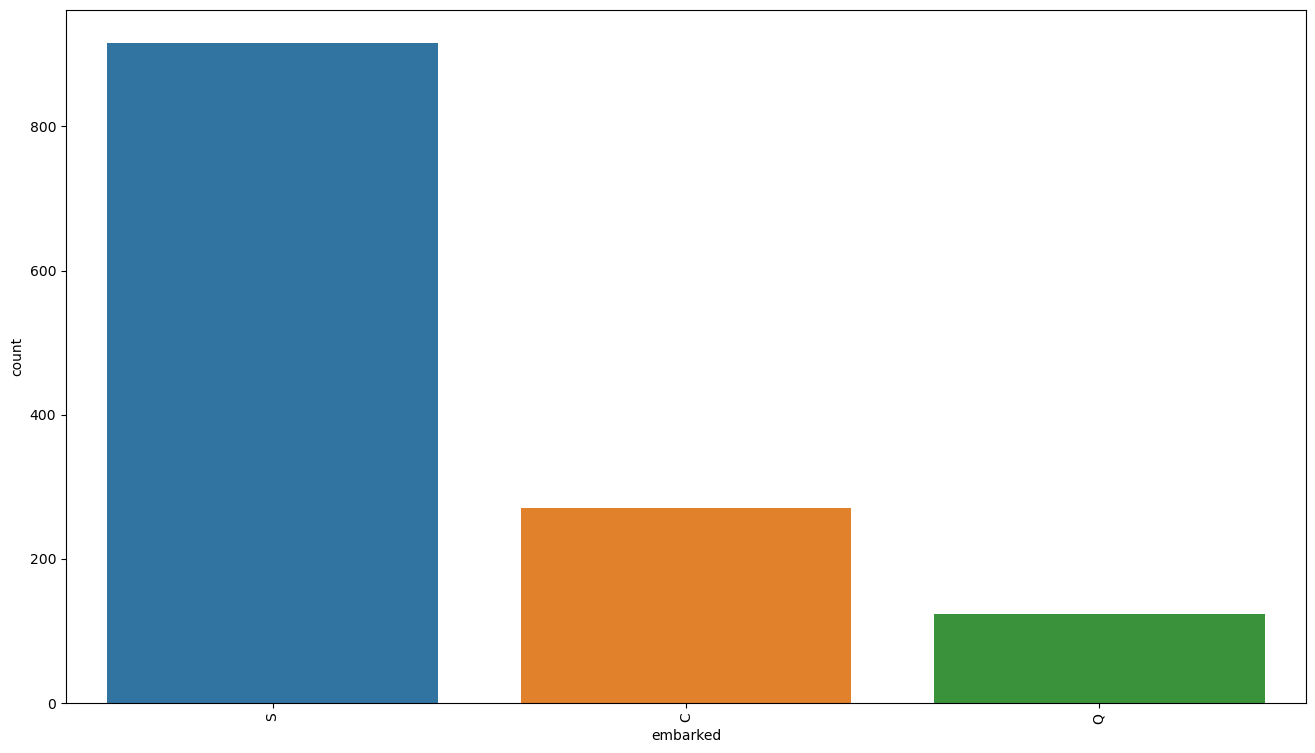

In [13]:
plt.subplots(figsize =(16,9))
ax = sb.countplot(x=newDf['embarked'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [ ]:
INSIGHT

This shows that three (3) categories of people embarked on the journey.

# BIVARIATE ANALYSIS COMPARING TWO DIFFERENT FEATURES

<AxesSubplot:xlabel='survived', ylabel='age'>

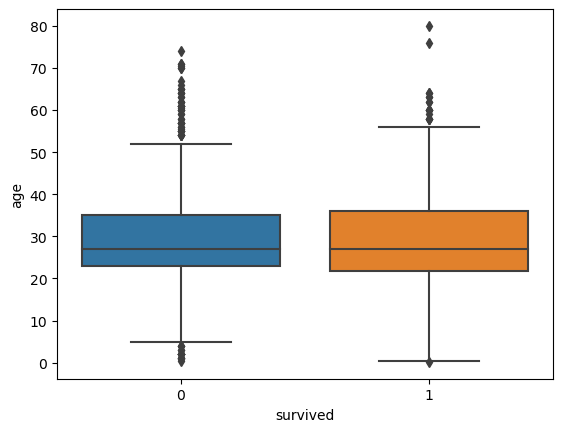

In [14]:
sb.boxplot(data = newDf, x= 'survived', y ='age')

<AxesSubplot:xlabel='survived', ylabel='embarked'>

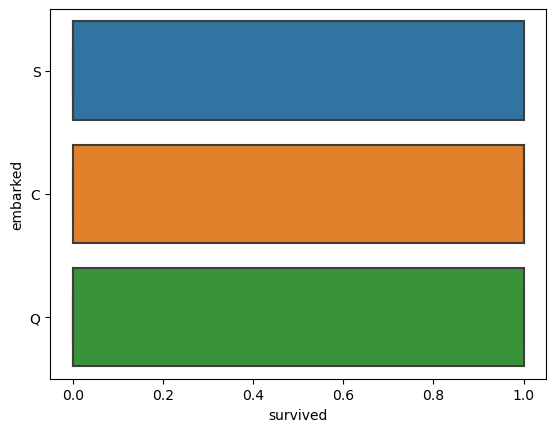

In [15]:
sb.boxplot(data = newDf, x= 'survived', y ='embarked')

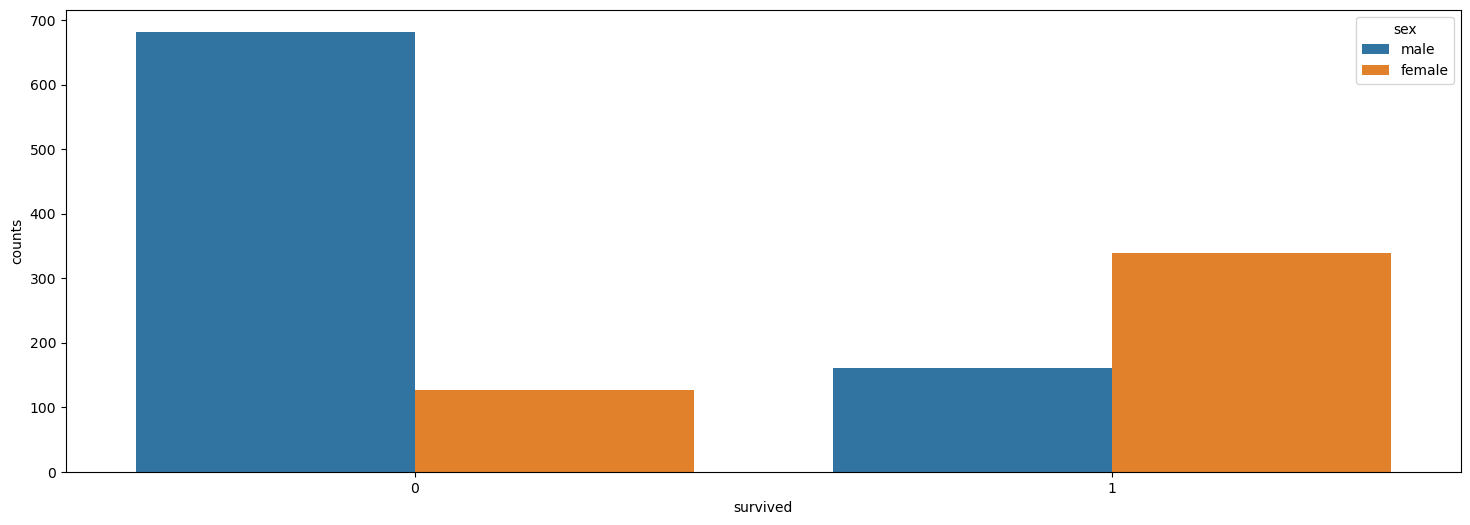

In [16]:
newDf = pd.DataFrame(newDf,columns=['survived','sex'])

newDf = pd.DataFrame(newDf.groupby(['survived','sex']).size().sort_values(ascending=False).rename('counts').reset_index())

dfplot =newDf.iloc[:20,:]
plt.figure(figsize=(18,6))
plt.xlabel('survived')
plt.ylabel('counts')

sb.barplot(x='survived', y='counts', hue='sex', data =dfplot)

plt.show()

In [ ]:
INSIGHTS

The above illustrates the number of different gender that survived the mishap.

# CONCLUSION

The dataset is one that indicated a mishap that happened, where different category of persons were onboard the ill-fated ship.

the Ship was wrecked and many people lost their lives. the visuals tried to depict the people number of persons that lost their lives, the category of people that boarded the Ship (Men, Women and Children)

i tried to draw inferences also on the poeple that embarked on the journey, their home-destination as represented in the data, their ages, boat and ticket numbers etc.

Also, the visual indicated that their is high percentage of male survival than female which might be as a reslt of some technical skills which Men have over the opposte gender.



